Importing necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [4]:
%pip install matplotlib
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.0 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 194.6/250.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.5 MB/s eta 0:00:00


In [13]:
df=pd.read_excel("../dataset/pred_model_dataset.xlsx")
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Reason for layoffs
0,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,Post-IPO,United States,26.0,economic downturn
1,Informatica,SF Bay Area,Data,545,0.10,2023-11-01,Post-IPO,United States,NaN,profitability shifts
2,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,Post-IPO,United States,26000.0,economic downturn
3,Microsoft,Seattle,Other,10000,0.05,2023-01-18,Post-IPO,United States,1.0,economic downturn
4,Amazon,Seattle,Retail,10000,0.03,2022-11-16,Post-IPO,United States,108.0,economic downturn
...,...,...,...,...,...,...,...,...,...,...
2096,TutorMundi,Sao Paulo,Education,4,1.00,2020-04-24,Series A,Brazil,2.0,pandemic impact
2097,Flytedesk,Boulder,Marketing,4,0.20,2020-03-18,Seed,United States,4.0,pandemic impact
2098,Spyce,Boston,Food,4,0.12,2020-04-08,Series A,United States,26.0,pandemic impact
2099,Branch,New York City,Retail,3,0.27,2020-06-11,Seed,United States,2.0,pandemic impact


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2101 non-null   object        
 1   location             2101 non-null   object        
 2   industry             2101 non-null   object        
 3   total_laid_off       2101 non-null   int64         
 4   percentage_laid_off  1504 non-null   float64       
 5   date                 2101 non-null   datetime64[ns]
 6   stage                2098 non-null   object        
 7   country              2101 non-null   object        
 8   funds_raised         1903 non-null   float64       
 9   Reason for layoffs   2101 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 164.3+ KB


In [15]:
df.isna().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off    597
date                     0
stage                    3
country                  0
funds_raised           198
Reason for layoffs       0
dtype: int64

In [24]:
df.describe()
df.to_csv("../dataset/origs.csv",index=False)

In [25]:
df = df[df['total_laid_off'].notna()]

In [26]:
df.isna().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off    597
date                     0
stage                    3
country                  0
funds_raised           198
Reason for layoffs       0
dtype: int64

In [27]:
df = df[df['Reason for layoffs'].notna()]

In [28]:
df.isna().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off    597
date                     0
stage                    3
country                  0
funds_raised           198
Reason for layoffs       0
dtype: int64

In [29]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Reason for layoffs
0,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,Post-IPO,United States,26.0,economic downturn
1,Informatica,SF Bay Area,Data,545,0.10,2023-11-01,Post-IPO,United States,NaN,profitability shifts
2,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,Post-IPO,United States,26000.0,economic downturn
3,Microsoft,Seattle,Other,10000,0.05,2023-01-18,Post-IPO,United States,1.0,economic downturn
4,Amazon,Seattle,Retail,10000,0.03,2022-11-16,Post-IPO,United States,108.0,economic downturn
...,...,...,...,...,...,...,...,...,...,...
2096,TutorMundi,Sao Paulo,Education,4,1.00,2020-04-24,Series A,Brazil,2.0,pandemic impact
2097,Flytedesk,Boulder,Marketing,4,0.20,2020-03-18,Seed,United States,4.0,pandemic impact
2098,Spyce,Boston,Food,4,0.12,2020-04-08,Series A,United States,26.0,pandemic impact
2099,Branch,New York City,Retail,3,0.27,2020-06-11,Seed,United States,2.0,pandemic impact


In [22]:
laidOff_countByCountry = df.groupby('country', as_index=False).sum()
df

TypeError: can only concatenate str (not "int") to str

WHICH ARE THE TOP TEN COUNTRIES THAT HAD LAY OFFS


In [ ]:
laidOff_countByCountry = df.groupby('country', as_index=False).sum()
sorted_df = laidOff_countByCountry.sort_values(by='total_laid_off', ascending=False)
sorted_df
top_ten_countries = sorted_df.head(10)
top_ten_countries

<ipython-input-7-92406dbbb31a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countByCountry = df.groupby('country', as_index=False).sum()


,country,total_laid_off,percentage_laid_off,funds_raised
48,United States,340479,203.1825,1.246722e+06
17,India,45724,25.5400,1.691886e+05
28,Netherlands,18055,1.0900,2.758400e+04
14,Germany,17573,12.8050,4.947968e+04
47,United Kingdom,13494,13.3200,4.926920e+04
42,Sweden,11959,1.6700,1.841800e+04
3,Brazil,11143,11.2500,3.066370e+04
5,Canada,9823,17.7000,1.527990e+04
39,Singapore,6995,6.3000,3.146698e+04
8,China,6120,0.5900,3.458800e+04


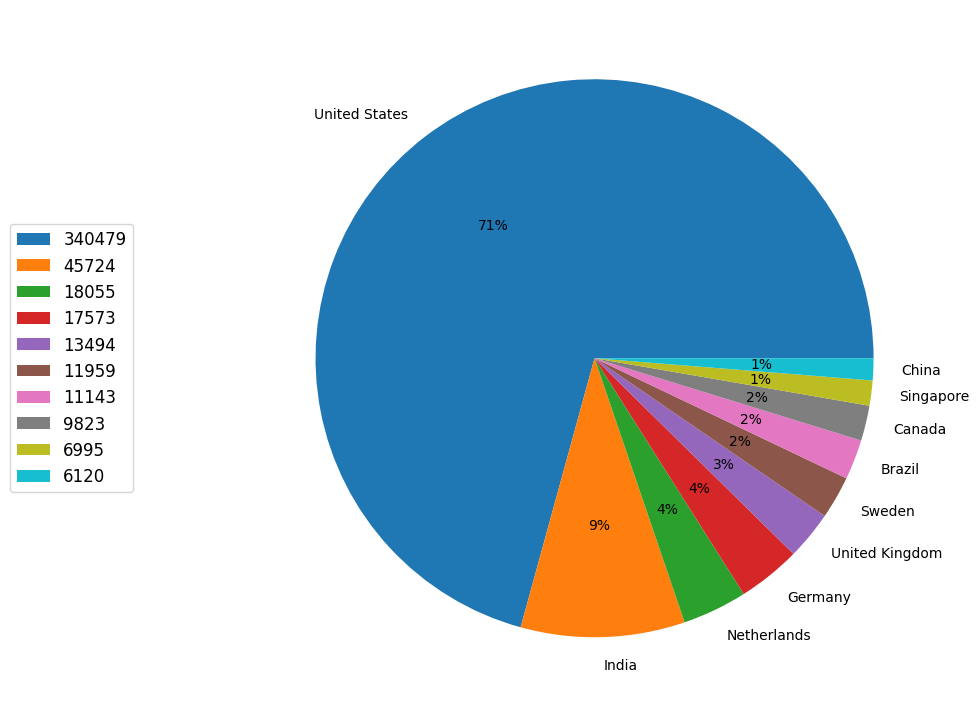

In [ ]:
mass_layoff_countries_list = ["United States", "India", "Netherlands", "Germany", "United Kingdom", "Sweden", "Brazil", "Canada", "Singapore", "China" ]

plt.figure(figsize=(9, 14))
plt.pie(data=mass_layoff_countries_list, x=top_ten_countries['total_laid_off'], labels=mass_layoff_countries_list,
        autopct='%.f%%')
plt.legend(top_ten_countries['total_laid_off'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=12)


plt.show()

INSIGHTS: ACCORDING TO THE DATA
1. UNITED STATES IS THE COUNTRY THAT FACED THE MOST LAYOFF WITH AROUND 71%
2. India has faced second most (9)% of the layoffs among all the layoffs shown in data

In [ ]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Reason for layoffs
1,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20,Post-IPO,United States,26.0,economic downturn
4,Informatica,SF Bay Area,Data,545.0,0.10,2023-11-01,Post-IPO,United States,NaN,profitability shifts
5,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,Post-IPO,United States,26000.0,economic downturn
6,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18,Post-IPO,United States,1.0,economic downturn
7,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,Post-IPO,United States,108.0,economic downturn
...,...,...,...,...,...,...,...,...,...,...
3142,TutorMundi,Sao Paulo,Education,4.0,1.00,2020-04-24,Series A,Brazil,2.0,pandemic impact
3144,Flytedesk,Boulder,Marketing,4.0,0.20,2020-03-18,Seed,United States,4.0,pandemic impact
3145,Spyce,Boston,Food,4.0,0.12,2020-04-08,Series A,United States,26.0,pandemic impact
3146,Branch,New York City,Retail,3.0,0.27,2020-06-11,Seed,United States,2.0,pandemic impact


IDENTIFYING MAJOR REASON FOR LAYOFFS


<ipython-input-12-ea69be6b5a32>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')


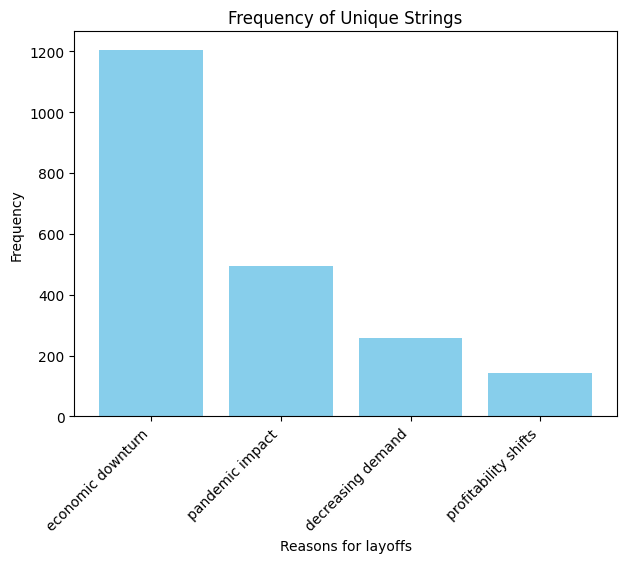

In [ ]:
data =df['Reason for layoffs']
df = pd.DataFrame(data)

# Count the occurrences of each unique string
value_counts = df['Reason for layoffs'].value_counts()
fig, ax = plt.subplots(figsize=(7, 5))  # Adjust the size of the figure

ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

# Create a bar chart
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Reasons for layoffs')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Strings')
plt.show()

INSIGHTS:
1. Economic downturn is the major cause of most layoffs


TOP TEN INDUSTRIES THAT FACED LAYOFFS


In [ ]:
laidOff_countbyindustry = df.groupby('industry', as_index=False).sum()
laidOff_countbyindustry

<ipython-input-25-781adab5f907>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countbyindustry = df.groupby('industry', as_index=False).sum()


,industry,total_laid_off,percentage_laid_off,funds_raised
0,AI,80.0,0.2000,193.0000
1,Aerospace,893.0,2.4500,4159.0000
2,Construction,3863.0,2.6400,5379.0000
3,Consumer,58522.0,16.0200,183692.5000
4,Crypto,13408.0,15.3900,18067.0000
5,Data,8220.0,10.1500,23966.4000
6,Education,16921.0,15.2500,32863.0000
7,Energy,1247.0,1.4400,2365.0000
8,Finance,36251.0,41.8250,124779.7800
9,Fitness,9051.0,4.3200,12649.6000


In [ ]:
sorted_df_industry = laidOff_countbyindustry.sort_values(by='total_laid_off', ascending=False)
sorted_df_industry
top_ten_industry = sorted_df_industry.head(10)
top_ten_industry

,industry,total_laid_off,percentage_laid_off,funds_raised
24,Retail,60423.0,27.580,68637.5000
3,Consumer,58522.0,16.020,183692.5000
20,Other,45590.0,15.940,44955.0000
28,Transportation,40587.0,19.934,320078.4000
10,Food,39767.0,24.965,103680.9755
8,Finance,36251.0,41.825,124779.7800
13,Healthcare,34234.0,29.200,56846.0000
12,Hardware,27219.0,1.270,7557.0000
29,Travel,19510.0,10.990,40140.2000
22,Real Estate,18946.0,16.750,93525.1000


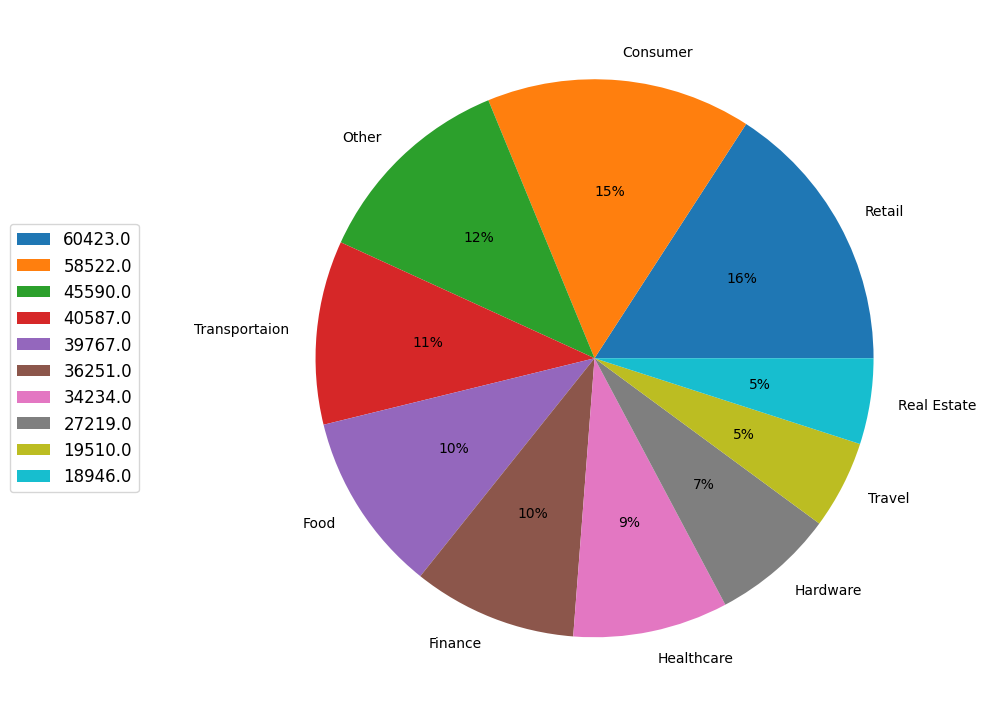

In [ ]:
mass_layoff_industry_list = ["Retail", "Consumer","Other","Transportaion","Food","Finance","Healthcare","Hardware","Travel","Real Estate"]

plt.figure(figsize=(9, 14))
plt.pie(data=mass_layoff_industry_list, x=top_ten_industry['total_laid_off'], labels=mass_layoff_industry_list,
        autopct='%.f%%')
plt.legend(top_ten_industry['total_laid_off'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=12)


plt.show()

INSIGHTS:
1. Top ten industries that faced layoffs are as seen in fig (figurenumber)
2. Your company may face layoffs if its part of the major industries that faced layoffs in the past


In [31]:
df.describe()

,total_laid_off,percentage_laid_off,date,funds_raised
count,2101.000000,1504.000000,2101,1903.000000
mean,242.516421,0.222917,2022-05-07 13:39:43.436458752,918.568237
min,3.000000,0.000000,2020-03-11 00:00:00,0.000000
25%,40.000000,0.100000,2022-03-15 00:00:00,58.000000
50%,80.000000,0.150000,2022-10-11 00:00:00,172.000000
75%,180.000000,0.280000,2023-02-17 00:00:00,480.000000
max,12000.000000,1.000000,2023-11-02 00:00:00,121900.000000
std,778.533186,0.209212,NaN,5959.401576


PREDICTION MODEL CREATION


In [ ]:
# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']  # 'extra_column' is the target variable we want to predict and rename as 'reason'

# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7933491686460807

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       1.00      0.07      0.13        56
   economic downturn       0.72      1.00      0.84       226
     pandemic impact       0.99      1.00      1.00       105
profitability shifts       0.00      0.00      0.00        34

            accuracy                           0.79       421
           macro avg       0.68      0.52      0.49       421
        weighted avg       0.77      0.79      0.72       421



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save the model for future use
joblib.dump(model, 'layoffs_reason_model.joblib')



['layoffs_reason_model.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('layoffs_reason_model.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Paytm'],
    'industry': ['Sales', 'Finance'],
    'date': ['2024-01-01', '2024-01-01'],
    'country': ['United States', 'United States'],
    'total_laid_off': [8000,12000],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)



Predictions on New Data:
       Company   Predicted_Reason
0  Salesforce  economic downturn
1       Paytm  economic downturn


In [ ]:
# Evaluate the model
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = model.classes_

# Display Confusion Matrix with Labels
print('\nConfusion Matrix:')
print(f'{"True Labels":<20}', end="")
print("Predicted Labels")
print("="*45)
for i, row in enumerate(conf_matrix):
    print(f'{class_labels[i]:<20}', end="")
    print(row)




Evaluation Metrics:
Accuracy: 0.7933491686460807

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       1.00      0.07      0.13        56
   economic downturn       0.72      1.00      0.84       226
     pandemic impact       0.99      1.00      1.00       105
profitability shifts       0.00      0.00      0.00        34

            accuracy                           0.79       421
           macro avg       0.68      0.52      0.49       421
        weighted avg       0.77      0.79      0.72       421


Confusion Matrix:
True Labels         Predicted Labels
decreasing demand   [ 4 52  0  0]
economic downturn   [  0 225   1   0]
pandemic impact     [  0   0 105   0]
profitability shifts[ 0 34  0  0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cross-Validation
cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
print('\nCross-Validation Scores:', cv_scores)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
print(subgroup_bias)



Cross-Validation Scores: [0.81472684 0.81190476 0.7952381  0.80714286 0.8047619 ]

Class Distribution:
economic downturn       0.573536
pandemic impact         0.235602
decreasing demand       0.122323
profitability shifts    0.068539
Name: Reason for layoffs, dtype: float64

Subgroup Bias (Industry):
Reason for layoffs  decreasing demand  economic downturn  pandemic impact  \
industry                                                                    
AI                                NaN                NaN              NaN   
Aerospace                         NaN           0.428571         0.428571   
Construction                 0.090909           0.363636         0.545455   
Consumer                     0.158879           0.485981         0.261682   
Crypto                       0.194805           0.727273         0.012987   
Data                         0.134328           0.522388         0.283582   
Education                    0.238636           0.522727         0.159091   
Ene

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from imblearn.over_sampling import RandomOverSampler


# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']

# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Address Class Imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Experiment with Different Models (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_nb_model = grid_search.best_estimator_

# Ensemble Methods (Voting Classifier)
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('nb', best_nb_model), ('rf', rf_model)], voting='soft')
ensemble_model.fit(X_resampled, y_resampled)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
    print('\nCross-Validation Scores:', cv_scores)

# Evaluate Naive Bayes model
print("Evaluation Metrics for Naive Bayes:")
evaluate_model(best_nb_model, X_test, y_test)

# Evaluate Random Forest model
print("\nEvaluation Metrics for Random Forest:")
evaluate_model(rf_model, X_test, y_test)

# Evaluate Ensemble model
print("\nEvaluation Metrics for Ensemble:")
evaluate_model(ensemble_model, X_test, y_test)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
subgroup_bias_cleaned = subgroup_bias.dropna()
print(subgroup_bias_cleaned)


Evaluation Metrics for Naive Bayes:
Accuracy: 0.8123515439429929

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.72      0.70      0.71        56
   economic downturn       0.83      0.82      0.82       226
     pandemic impact       0.98      1.00      0.99       105
profitability shifts       0.35      0.38      0.37        34

            accuracy                           0.81       421
           macro avg       0.72      0.72      0.72       421
        weighted avg       0.81      0.81      0.81       421


Confusion Matrix:
 [[ 39  17   0   0]
 [ 15 185   2  24]
 [  0   0 105   0]
 [  0  21   0  13]]

Cross-Validation Scores: [0.77672209 0.75238095 0.73571429 0.73809524 0.84047619]

Evaluation Metrics for Random Forest:
Accuracy: 0.9714964370546318

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.98      0.95      0.96        56
   economic d

In [ ]:
# Save the model for future use
joblib.dump(rf_model, 'layoffs_reason_rfmodel.joblib')



['layoffs_reason_rfmodel.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('layoffs_reason_rfmodel.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Unacademy'],
    'industry': ['Sales', 'Education'],
    'date': ['2024-01-01', '2024-06-29'],
    'country': ['United States', 'India'],
    'total_laid_off': [8000,1200],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)


Predictions on New Data:
       Company   Predicted_Reason
0  Salesforce  economic downturn
1   Unacademy  decreasing demand


In [ ]:
# Save the model for future use
joblib.dump(ensemble_model, 'layoffs_reason_ensemble_model.joblib')


['layoffs_reason_ensemble_model.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('layoffs_reason_ensemble_model.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Rigup'],
    'industry': ['Sales', 'Energy'],
    'date': ['2024-01-01', '2024-10-10'],
    'country': ['United States', 'United States'],
    'total_laid_off': [8000,12000],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)


Predictions on New Data:
       Company      Predicted_Reason
0  Salesforce     economic downturn
1       Rigup  profitability shifts


Extra

Below




Evaluation Metrics for Naive Bayes:
Accuracy: 0.8123515439429929

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.72      0.70      0.71        56
   economic downturn       0.83      0.82      0.82       226
     pandemic impact       0.98      1.00      0.99       105
profitability shifts       0.35      0.38      0.37        34

            accuracy                           0.81       421
           macro avg       0.72      0.72      0.72       421
        weighted avg       0.81      0.81      0.81       421


Confusion Matrix:
 [[ 39  17   0   0]
 [ 15 185   2  24]
 [  0   0 105   0]
 [  0  21   0  13]]

Cross-Validation Scores: [0.77672209 0.75238095 0.73571429 0.73809524 0.84047619]


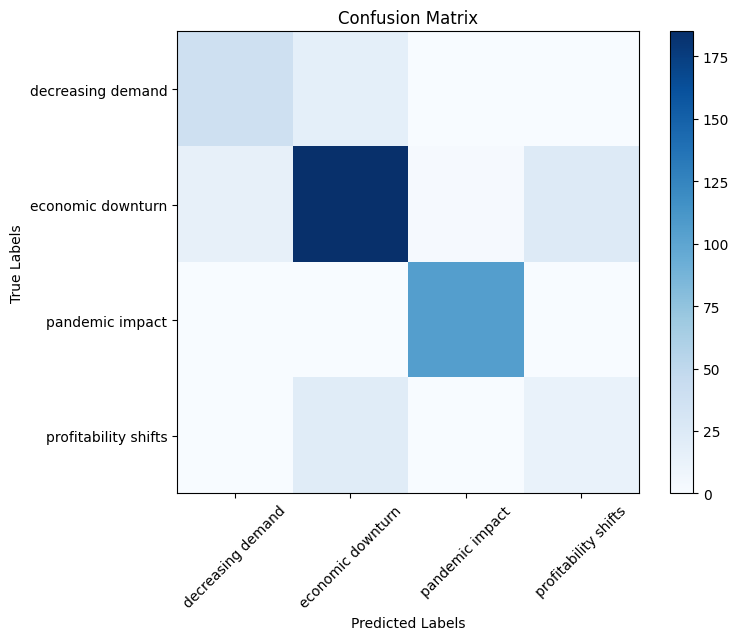

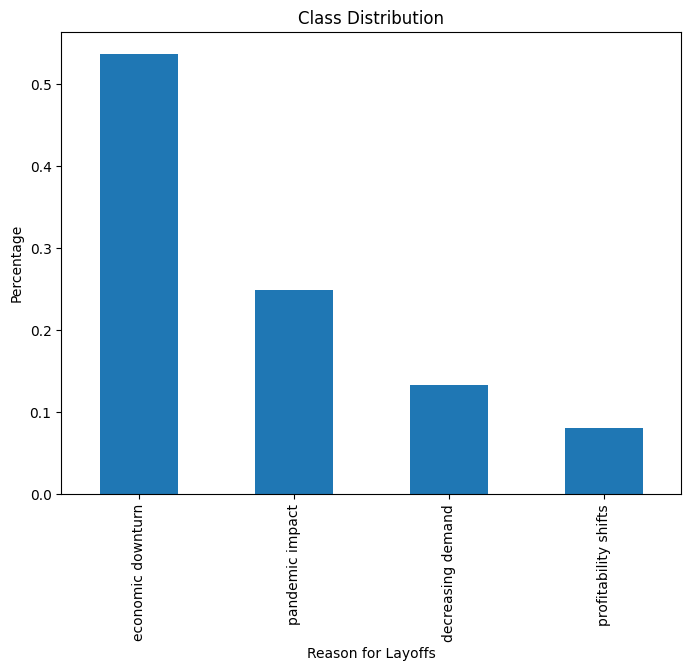





Evaluation Metrics for Random Forest:
Accuracy: 0.9714964370546318

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.98      0.95      0.96        56
   economic downturn       0.96      0.99      0.97       226
     pandemic impact       1.00      1.00      1.00       105
profitability shifts       0.93      0.82      0.87        34

            accuracy                           0.97       421
           macro avg       0.97      0.94      0.95       421
        weighted avg       0.97      0.97      0.97       421


Confusion Matrix:
 [[ 53   3   0   0]
 [  1 223   0   2]
 [  0   0 105   0]
 [  0   6   0  28]]

Cross-Validation Scores: [0.89311164 0.9        0.90238095 0.89285714 0.88809524]


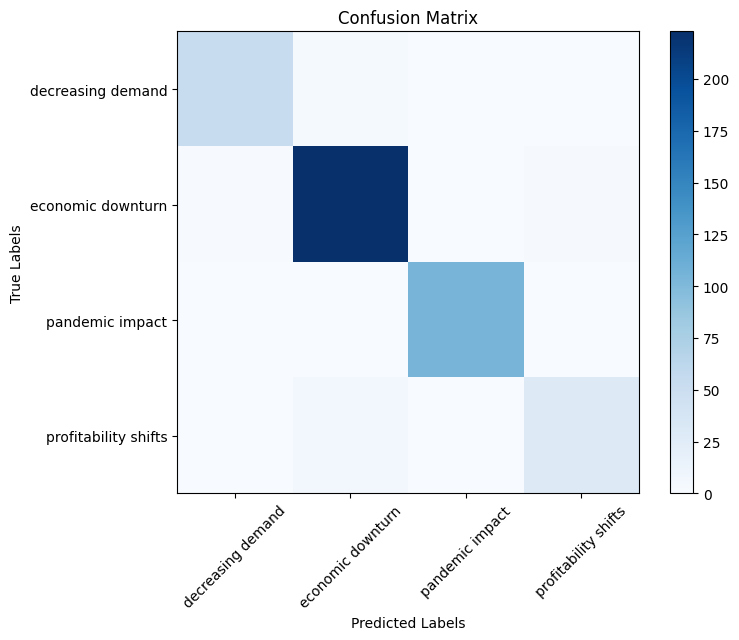

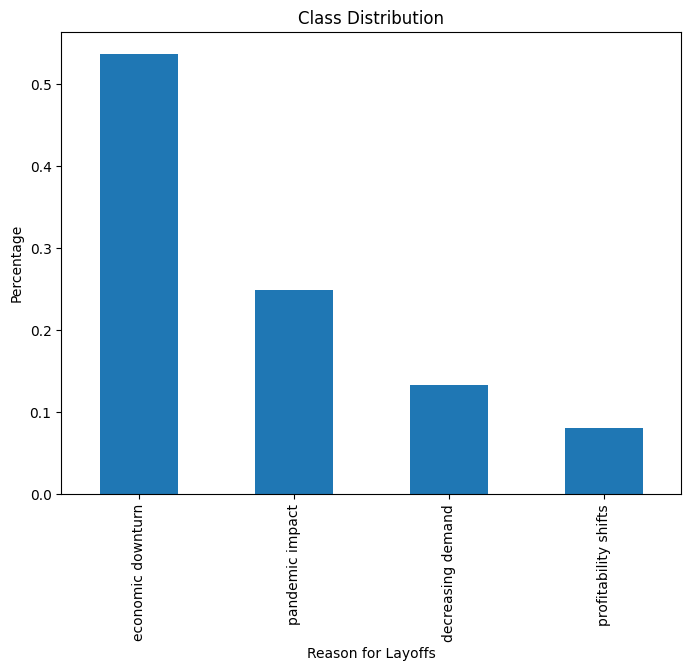


Predictions on New Data With The Best among the models (RF MODEL):
       Company   Predicted_Reason
0  Salesforce  economic downturn
1   Unacademy  decreasing demand

Class Distribution:
economic downturn       0.573536
pandemic impact         0.235602
decreasing demand       0.122323
profitability shifts    0.068539
Name: Reason for layoffs, dtype: float64

Subgroup Bias (Industry):
Reason for layoffs  decreasing demand  economic downturn  pandemic impact  \
industry                                                                    
Consumer                     0.158879           0.485981         0.261682   
Crypto                       0.194805           0.727273         0.012987   
Data                         0.134328           0.522388         0.283582   
Education                    0.238636           0.522727         0.159091   
Energy                       0.300000           0.300000         0.200000   
Finance                      0.145522           0.574627         0.22388

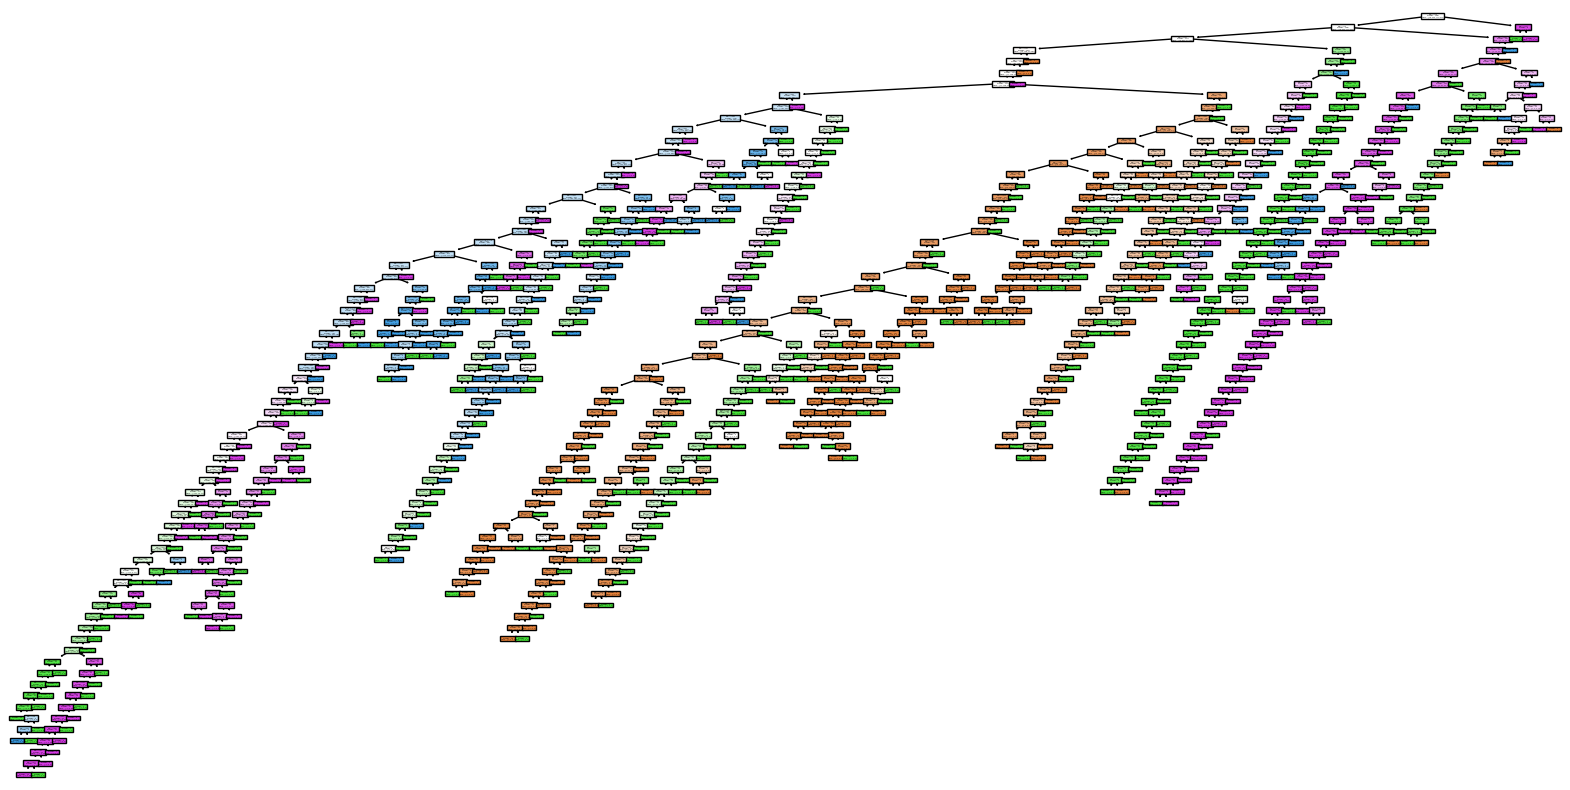

In [ ]:
# Import necessary libraries111
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']

# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))
feature_names = vectorizer.get_feature_names_out()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Address Class Imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Experiment with Different Models (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


print('\n')


# Hyperparameter Tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_nb_model = grid_search.best_estimator_

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
    print('\nCross-Validation Scores:', cv_scores)

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(model.classes_))
    plt.xticks(tick_marks, model.classes_, rotation=45)
    plt.yticks(tick_marks, model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Add space between visualizations
    print('\n\n')

    # Visualize Class Distribution
    plt.figure(figsize=(8, 6))
    class_distribution = y_test.value_counts(normalize=True)
    class_distribution.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Reason for Layoffs')
    plt.ylabel('Percentage')
    plt.show()

# Evaluate Naive Bayes model
print("Evaluation Metrics for Naive Bayes:")
evaluate_model(best_nb_model, X_test, y_test)

# Add space between models
print('\n\n')

# Evaluate Random Forest model
print("\nEvaluation Metrics for Random Forest:")
evaluate_model(rf_model, X_test, y_test)

#save the model
joblib.dump(rf_model, 'layoffs_reason_rfmodel.joblib')

# Load the saved model
loaded_model = joblib.load('layoffs_reason_rfmodel.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Unacademy'],
    'industry': ['Sales', 'Education'],
    'date': ['2024-01-01', '2024-06-29'],
    'country': ['United States', 'India'],
    'total_laid_off': [8000,1200],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data With The Best among the models (RF MODEL):\n', predictions_df)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
subgroup_bias_cleaned = subgroup_bias.dropna()
print(subgroup_bias_cleaned)

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True)
plt.show()

INSIGHTS :

--Acceptable Bias:

Consumer, Data, Finance, Real Estate, Retail, Security, Fitness, Healthcare, Media, Product, Logistics, Education: These industries show relatively balanced distributions across different reasons for layoffs

--Concerning Bias:

Crypto, Sales, HR, Travel: These industries demonstrate a significant bias towards one specific reason for layoffs.

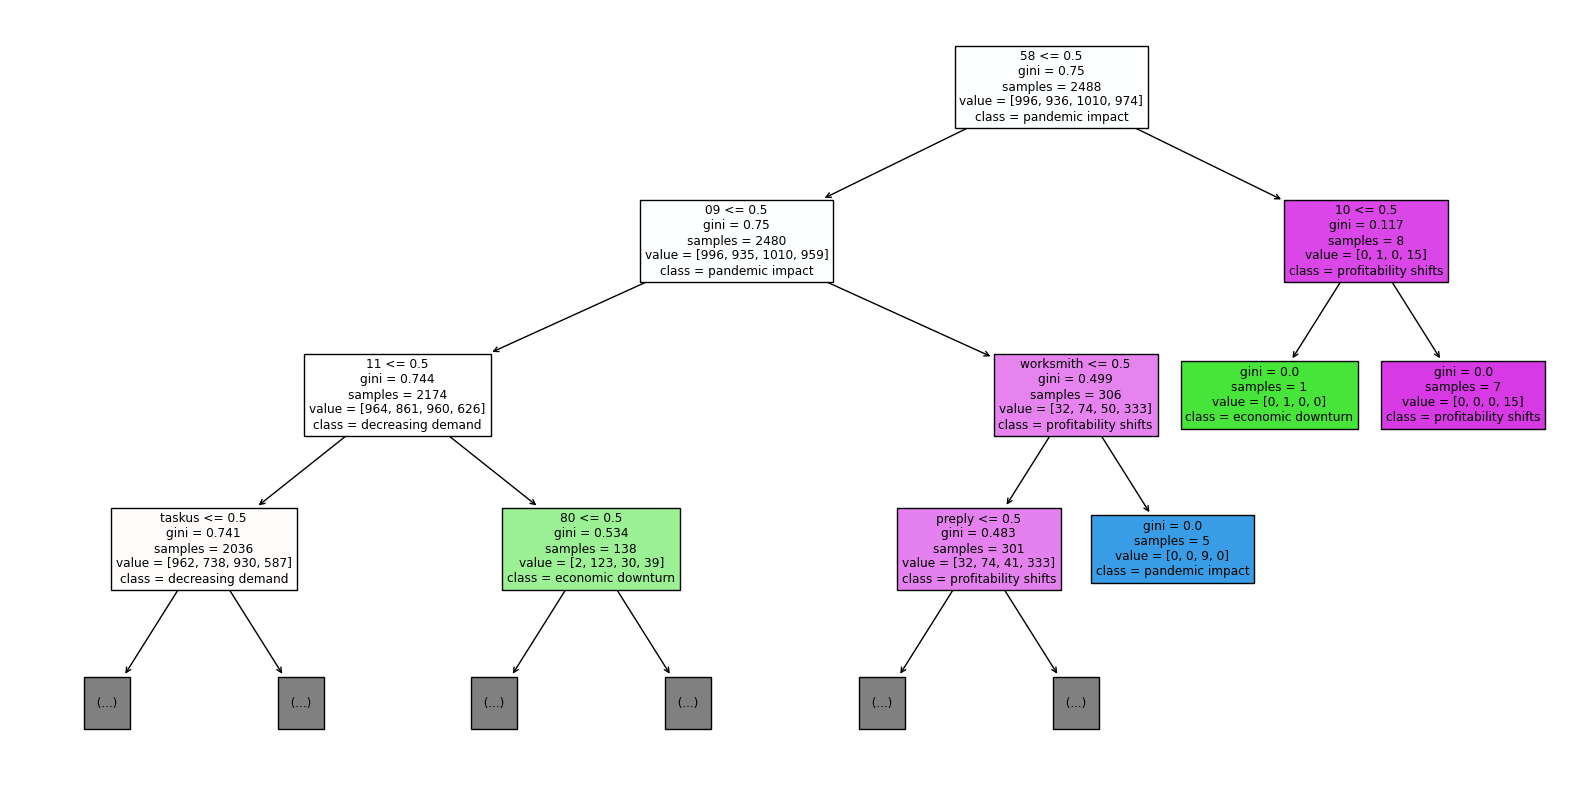

In [ ]:
# Visualize Decision Trees in Random Forest
plt.figure(figsize=(20,10))
class_labels = rf_model.classes_
plot_tree(rf_model.estimators_[0], feature_names=feature_names, class_names=class_labels, filled=True, max_depth=3)  # Limiting depth to 3
plt.show()
